In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/11111111/preprocessed_1700.csv')
data

,Unnamed: 0,Force,P2,P3,P4
0,0,0.000000,0.000000e+00,1.000000,1.000000
1,1,0.000971,0.000000e+00,1.000000,1.000000
2,2,0.002050,0.000000e+00,1.000000,1.000000
3,3,0.003129,0.000000e+00,0.957627,1.000000
4,4,0.004208,0.000000e+00,0.717980,1.000000
...,...,...,...,...,...
1840,1840,0.997842,1.887904e-25,0.002151,0.000053
1841,1841,0.998382,1.890311e-25,0.002149,0.000053
1842,1842,0.998921,1.892719e-25,0.002148,0.000053
1843,1843,0.999461,1.895129e-25,0.002146,0.000053


In [ ]:
x = data['Force']
print(x)

0       0.000000
1       0.000971
2       0.002050
3       0.003129
4       0.004208
          ...   
1840    0.997842
1841    0.998382
1842    0.998921
1843    0.999461
1844    1.000000
Name: Force, Length: 1845, dtype: float64


In [ ]:
y = data[["P2" , "P3" , "P4"]]
print(y)

                P2        P3        P4
0     0.000000e+00  1.000000  1.000000
1     0.000000e+00  1.000000  1.000000
2     0.000000e+00  1.000000  1.000000
3     0.000000e+00  0.957627  1.000000
4     0.000000e+00  0.717980  1.000000
...            ...       ...       ...
1840  1.887904e-25  0.002151  0.000053
1841  1.890311e-25  0.002149  0.000053
1842  1.892719e-25  0.002148  0.000053
1843  1.895129e-25  0.002146  0.000053
1844  1.897541e-25  0.002144  0.000053

[1845 rows x 3 columns]


In [ ]:
X = x.to_numpy()
Y = y.to_numpy()
print(X.shape , Y.shape)

(1845,) (1845, 3)


In [ ]:
x_train ,x_test , y_train , y_test = train_test_split(X , Y , test_size= 0.2 , random_state= 69)
# x_valid , x_test , y_valid , y_test = train_test_split(x_temp , y_temp , test_size= 0.5 , random_state= 100)

In [ ]:
EPOCHS  = 25

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              8192      
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9480963 (36.17 MB)
Trainable params: 9480963 (36.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


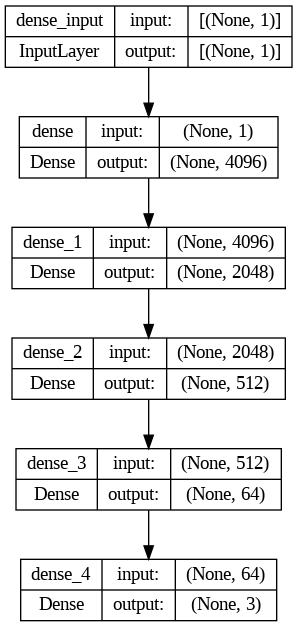

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096 , activation='relu' , input_shape = (1,)),
    tf.keras.layers.Dense(2048 , activation='relu'),
    tf.keras.layers.Dense(512 , activation='relu'),
    tf.keras.layers.Dense(64 , activation='relu'),
    tf.keras.layers.Dense(3 , activation= 'sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)


model.compile(
    optimizer=opt,
    loss = 'binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()

plot_model(model, to_file=f"DOME.png", show_shapes=True)

In [ ]:
history = model.fit(
    x_train , y_train ,
    epochs = EPOCHS
)

Epoch 1/25
47/47 [==============================] - 2s 7ms/step - loss: 0.4092 - accuracy: 0.0955
Epoch 2/25
47/47 [==============================] - 0s 6ms/step - loss: 0.0742 - accuracy: 0.0969
Epoch 3/25
47/47 [==============================] - 0s 6ms/step - loss: 0.0693 - accuracy: 0.0969
Epoch 4/25
47/47 [==============================] - 0s 6ms/step - loss: 0.0679 - accuracy: 0.0969
Epoch 5/25
47/47 [==============================] - 0s 6ms/step - loss: 0.0665 - accuracy: 0.0969
Epoch 6/25
47/47 [==============================] - 0s 6ms/step - loss: 0.0652 - accuracy: 0.0969
Epoch 7/25
47/47 [==============================] - 0s 6ms/step - loss: 0.0634 - accuracy: 0.0969
Epoch 8/25
47/47 [==============================] - 0s 6ms/step - loss: 0.0610 - accuracy: 0.0969
Epoch 9/25
47/47 [==============================] - 0s 6ms/step - loss: 0.0566 - accuracy: 0.4024
Epoch 10/25
47/47 [==============================] - 0s 6ms/step - loss: 0.0511 - accuracy: 0.8957
Epoch 11/25
47/47 [

In [ ]:
model_name = "5e-eLL_Adam_tryn"

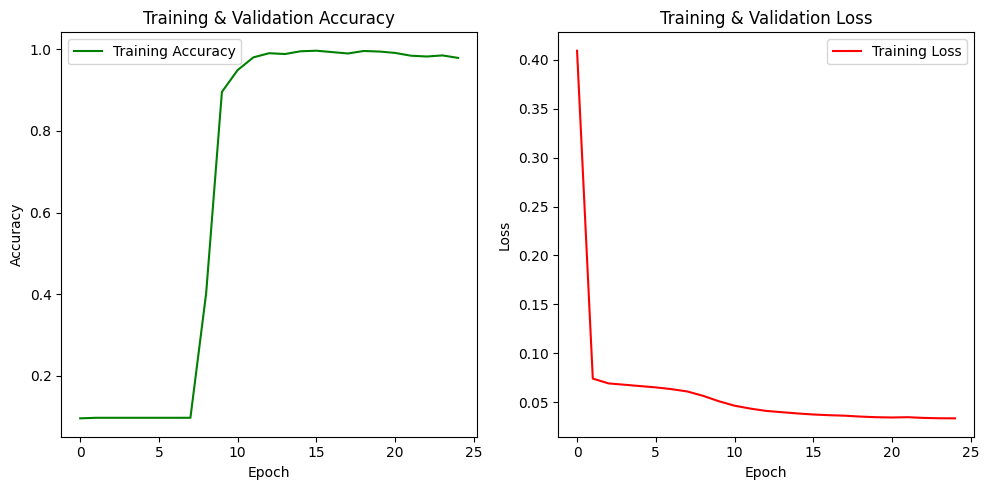

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy' , color = 'green')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss' , color = 'red')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/11111111/graphs{model_name}{EPOCHS}.png")
plt.show()


In [ ]:
model.evaluate(x_test , y_test)

12/12 [==============================] - 0s 4ms/step - loss: 0.0351 - accuracy: 0.9621


[0.035106513649225235, 0.9620596170425415]

In [ ]:
model.save(f"/content/drive/MyDrive/11111111/models/{model_name}_{EPOCHS}")

In [ ]:
maxf = 862500
minf = 100

max1 = 16009548.698299369
min1 = 1000.0

max2 = 15.0
min2 = 0.0499652431778535

max3 = 1000000
min3 = 52.697

maxes = [max1,max2,max3]
mines = [min1,min2,min3]

def linear_scaling(x , min , max):
    return (x-min)/(max-min)*1.0

def inverse_linear_scaling(x , min , max):
    return x*(max-min) + min

In [ ]:
force = 656123

In [ ]:
force = linear_scaling(force , maxf , minf)
print(force)

0.239305426716141


In [ ]:
363,0.2005610098176718,2.9461078269999996e-27,0.014503026033647514,0.003382826536
1288,0.7000755205523789,8.099807994999999e-26,0.003473037641316538,0.00012344447619999998

(1288,
 0.7000755205523789,
 8.099807994999999e-26,
 0.003473037641316538,
 0.00012344447619999998)

In [ ]:
predictions = model.predict([0.2])
print(predictions)

1/1 [==============================] - 0s 31ms/step
[[0.00186762 0.01427636 0.00380723]]


In [ ]:
pred = []
for i in range(3):
  pred.append(inverse_linear_scaling(predictions[0][i] , mines[i] , maxes[i]))

force_normal = inverse_linear_scaling(0.2 , minf , maxf )
print(force_normal)
print(pred)

172580.0
[30897.959067749587, 0.26339736556463644, 3859.729551083813]
